In [ ]:
!pip install garden_ai

In [2]:
from garden_ai import GardenClient
gc = GardenClient()

In [14]:
wisconsin_garden = gc.get_published_garden("10.23677/qa1v-t709")

In [5]:
compounds = ['La0.6Sr0.4Co0.2Fe0.8O3', 'Ba0.5Sr0.5Co0.8Fe0.2O3', 'La0.8Sr0.2MnO3']
electrolytes = ['ceria', 'ceria', 'zirconia']

In [15]:
preds = wisconsin_garden.asr_predict(compounds, electrolytes)

In [12]:
preds

,Compositions,Electrolytes,Cost ($/kg),Stability @ 500C (meV/atom),ASR barrier (eV),log ASR at 500C (Ohm-cm2),log ASR error (Ohm-cm2)
0,La0.6Sr0.4Co0.2Fe0.8O3,ceria,133.672989,41.669610,1.411684,1.326496,0.471312
1,Ba0.5Sr0.5Co0.8Fe0.2O3,ceria,8.750681,130.604608,1.205874,0.206754,0.553044
2,La0.8Sr0.2MnO3,zirconia,169.046056,214.202900,1.564999,3.552795,0.575237


<Figure size 640x480 with 0 Axes>

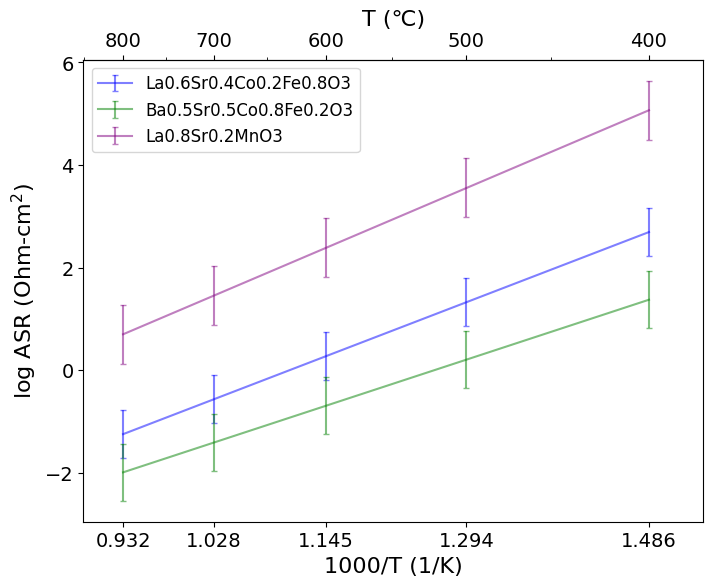

In [16]:
import math
import numpy as np
from matplotlib import markers
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

plt.rcParams.update({'font.size': 14})

comps = preds['Compositions']
preds_barrier = preds['ASR barrier (eV)']
preds_ASR = preds['log ASR at 500C (Ohm-cm2) (RF)']
errs_recal = preds['log ASR error (Ohm-cm2) (RF)']

T0 = 400+273
T1 = 500+273
T2 = 600+273
T3 = 700+273
T4 = 800+273
k = 8.619*10**-5
plt.clf()
fig = plt.figure(figsize=(8, 6))
ax = plt.axes()

x = [1000/T0, 1000/T1, 1000/T2, 1000/T3, 1000/T4]

# Define function and its inverse
def k2c(x):
    x = np.array(x).astype(float)
    return 1000/x - 273.15
def c2k(x):
    x = np.array(x).astype(float)
    return 1000/(x + 273.15)

colors = ['blue', 'green', 'purple', 'red', 'orange', 'black']
for c, pred, barrier, col, ebar in zip(comps, preds_ASR, preds_barrier, colors, errs_recal): # or use preds_ASR_adj
    pred_400 = np.log10(10**pred / math.exp(-(barrier/k)*(1/T0 - 1/T1)))
    pred_600 = np.log10(10**pred / math.exp(-(barrier/k)*(1/T2 - 1/T1)))
    pred_700 = np.log10(10**pred / math.exp(-(barrier/k)*(1/T3 - 1/T1)))
    pred_800 = np.log10(10**pred / math.exp(-(barrier/k)*(1/T4 - 1/T1)))
    y = [pred_400, pred, pred_600, pred_700, pred_800]
    ax.errorbar(x, y, ebar, color=col, alpha=0.5, capsize=2, label=c)

ax.legend(loc='best', fontsize=12)
ax.set_xlabel('1000/T (1/K)', fontsize=16)
ax.set_ylabel('log ASR (Ohm-cm$^2$)', fontsize=16)

ax.set_xlim(0.89, 1.543)
ax1 = ax.secondary_xaxis("top", functions=(k2c,c2k))
ax1.xaxis.set_major_locator(MultipleLocator(100))
ax1.xaxis.set_minor_locator(MultipleLocator(50))
ax1.set_xlabel(u'T (\u2103)', fontsize=16)
ax.set_xticks(ticks=[1000/T0, 1000/T1, 1000/T2, 1000/T3, 1000/T4])
ax.set_xticklabels(labels=[round(1000/T0,3), round(1000/T1,3), round(1000/T2,3), round(1000/T3,3), round(1000/T4,3)], fontsize=14)

fig.savefig('ML_preds_temp.png', dpi=300, bbox_inches='tight')
fig.show()